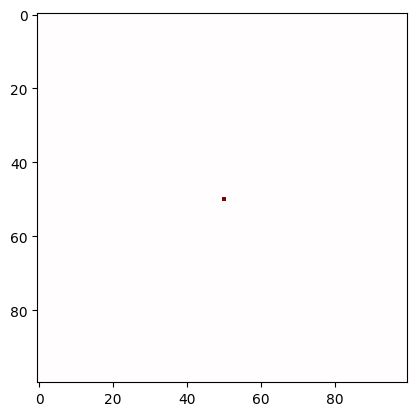

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
Nx, Ny = 100, 100  # Grid size
dx = dy = 1.0      # Grid spacing
dt = 0.01          # Time step
T = 2.0            # Total simulation time
v = 3.0            # Wave velocity

# Initialize wave fields
u = np.zeros((Nx, Ny))
u_old = np.zeros((Nx, Ny))
u_new = np.zeros((Nx, Ny))

# Initial source (epicenter)
source_x, source_y = Nx//2, Ny//2
u[source_x, source_y] = 1.0  # Initial pulse

# Time-stepping loop
frames = []
for t in np.arange(0, T, dt):
    # Compute wave equation update
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            u_new[i, j] = (2 * u[i, j] - u_old[i, j] + 
                           (v**2 * dt**2 / dx**2) * 
                           (u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1] - 4*u[i, j]))

    # Swap variables
    u_old, u, u_new = u, u_new, u_old

    # Store frames for visualization
    frames.append(np.copy(u))

# Animate results
import matplotlib.animation as animation

fig, ax = plt.subplots()
cax = ax.imshow(frames[0], cmap='seismic', vmin=-1, vmax=1)

def update(frame):
    cax.set_data(frame)

ani = animation.FuncAnimation(fig, update, frames=frames, interval=50)
plt.show()